In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pydicom
import numpy as np
import os
import glob
from tqdm import tqdm
import warnings

In [2]:
train=pd.read_csv("../train.csv")

In [3]:
print("Total Cases: ",len(train))

Total Cases:  1975


In [4]:
train.columns

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

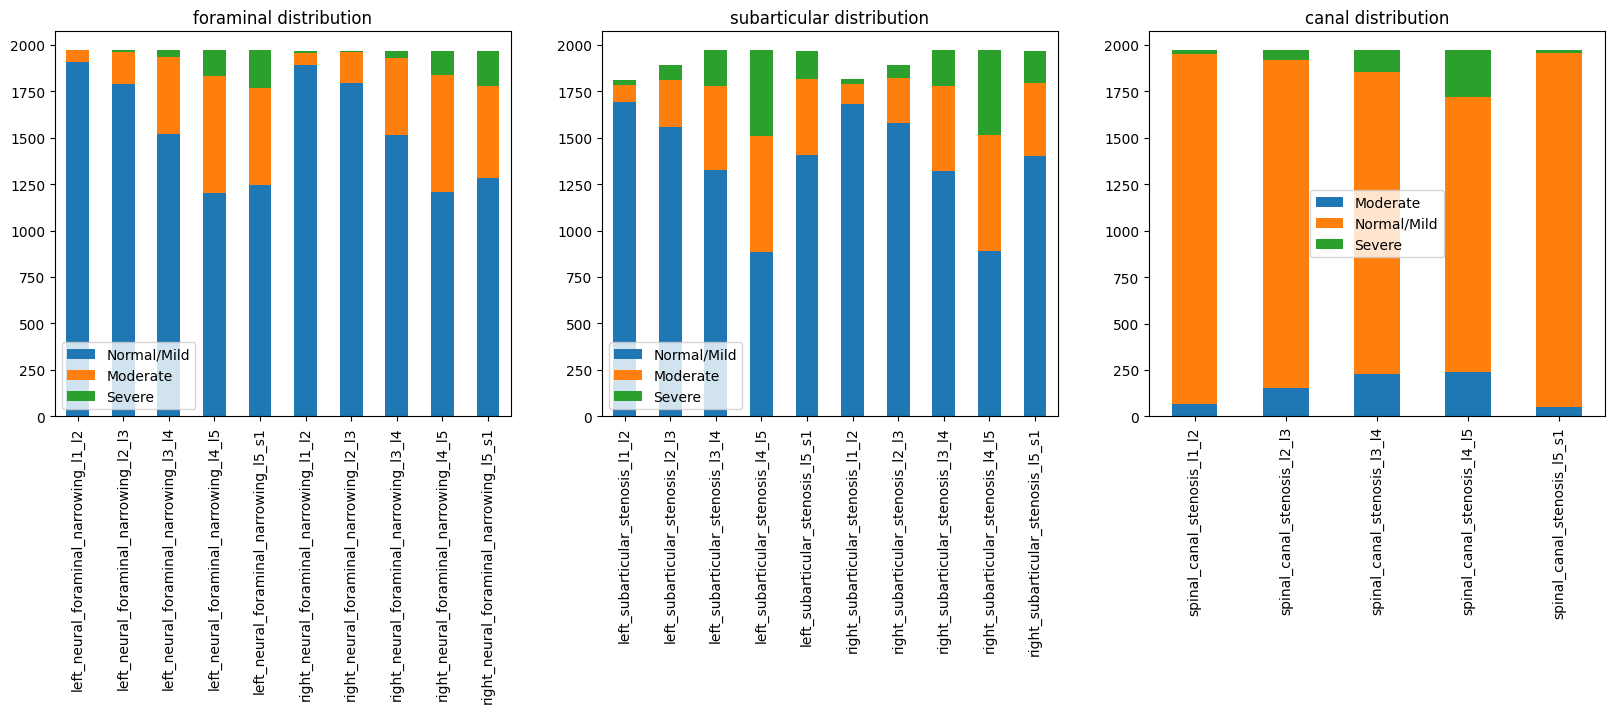

In [5]:
figure, axis = plt.subplots(1,3, figsize=(20,5)) 
for idx, d in enumerate(['foraminal', 'subarticular', 'canal']):
    diagnosis = list(filter(lambda x: x.find(d) > -1, train.columns))
    dff = train[diagnosis]
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
        value_counts = dff.apply(pd.value_counts).fillna(0).T
    value_counts.plot(kind='bar', stacked=True, ax=axis[idx])
    axis[idx].set_title(f'{d} distribution')

In [6]:
part_1=os.listdir('../train_images')
part_1=list(filter(lambda x:x.find('.DS')==-1,part_1))

In [7]:
df_meta_f=pd.read_csv('../train_series_descriptions.csv')

In [8]:
p1 = [(x, f"../train_images/{x}") for x in part_1]
p1

[('100206310', '../train_images/100206310'),
 ('1002894806', '../train_images/1002894806'),
 ('1004726367', '../train_images/1004726367'),
 ('1008446160', '../train_images/1008446160'),
 ('1009445512', '../train_images/1009445512'),
 ('1009905322', '../train_images/1009905322'),
 ('1012375618', '../train_images/1012375618'),
 ('1013589491', '../train_images/1013589491'),
 ('1013791258', '../train_images/1013791258'),
 ('1018005303', '../train_images/1018005303'),
 ('1019430579', '../train_images/1019430579'),
 ('1020394063', '../train_images/1020394063'),
 ('1025265129', '../train_images/1025265129'),
 ('1028684462', '../train_images/1028684462'),
 ('1028909382', '../train_images/1028909382'),
 ('1035170868', '../train_images/1035170868'),
 ('1036203708', '../train_images/1036203708'),
 ('1038453736', '../train_images/1038453736'),
 ('1039182563', '../train_images/1039182563'),
 ('1040921274', '../train_images/1040921274'),
 ('1047914296', '../train_images/1047914296'),
 ('1050200728',

In [10]:
meta_obj = { p[0]: { 'folder_path': p[1], 
                    'SeriesInstanceUIDs': [] 
                   } 
            for p in p1 }
meta_obj

{'100206310': {'folder_path': '../train_images/100206310',
  'SeriesInstanceUIDs': []},
 '1002894806': {'folder_path': '../train_images/1002894806',
  'SeriesInstanceUIDs': []},
 '1004726367': {'folder_path': '../train_images/1004726367',
  'SeriesInstanceUIDs': []},
 '1008446160': {'folder_path': '../train_images/1008446160',
  'SeriesInstanceUIDs': []},
 '1009445512': {'folder_path': '../train_images/1009445512',
  'SeriesInstanceUIDs': []},
 '1009905322': {'folder_path': '../train_images/1009905322',
  'SeriesInstanceUIDs': []},
 '1012375618': {'folder_path': '../train_images/1012375618',
  'SeriesInstanceUIDs': []},
 '1013589491': {'folder_path': '../train_images/1013589491',
  'SeriesInstanceUIDs': []},
 '1013791258': {'folder_path': '../train_images/1013791258',
  'SeriesInstanceUIDs': []},
 '1018005303': {'folder_path': '../train_images/1018005303',
  'SeriesInstanceUIDs': []},
 '1019430579': {'folder_path': '../train_images/1019430579',
  'SeriesInstanceUIDs': []},
 '1020394063

In [11]:
for m in meta_obj:
    meta_obj[m]['SeriesInstanceUIDs'] = list(
        filter(lambda x: x.find('.DS') == -1, 
               os.listdir(meta_obj[m]['folder_path'])
              )
    )

meta_obj

{'100206310': {'folder_path': '../train_images/100206310',
  'SeriesInstanceUIDs': ['1012284084', '1792451510', '2092806862']},
 '1002894806': {'folder_path': '../train_images/1002894806',
  'SeriesInstanceUIDs': ['1252873726', '801316590', '866293114']},
 '1004726367': {'folder_path': '../train_images/1004726367',
  'SeriesInstanceUIDs': ['1709080005', '2526352865', '992525108']},
 '1008446160': {'folder_path': '../train_images/1008446160',
  'SeriesInstanceUIDs': ['2539455828', '2720025375', '3775545364']},
 '1009445512': {'folder_path': '../train_images/1009445512',
  'SeriesInstanceUIDs': ['1705522953',
   '2883858173',
   '3088482668',
   '4018190332']},
 '1009905322': {'folder_path': '../train_images/1009905322',
  'SeriesInstanceUIDs': ['1243755365', '1870630737', '3461716915']},
 '1012375618': {'folder_path': '../train_images/1012375618',
  'SeriesInstanceUIDs': ['352098527', '4014890929', '588002243']},
 '1013589491': {'folder_path': '../train_images/1013589491',
  'SeriesInst

In [12]:
# grabs the correspoding series descriptions
for k in tqdm(meta_obj):
    for s in meta_obj[k]['SeriesInstanceUIDs']:
        if 'SeriesDescriptions' not in meta_obj[k]:
            meta_obj[k]['SeriesDescriptions'] = []
        try:
            meta_obj[k]['SeriesDescriptions'].append(
                df_meta_f[(df_meta_f['study_id'] == int(k)) & 
                (df_meta_f['series_id'] == int(s))]['series_description'].iloc[0])
        except:
            print("Failed on", s, k)

100%|██████████| 1975/1975 [00:04<00:00, 470.22it/s]


In [13]:
meta_obj[list(meta_obj.keys())[1]]

{'folder_path': '../train_images/1002894806',
 'SeriesInstanceUIDs': ['1252873726', '801316590', '866293114'],
 'SeriesDescriptions': ['Axial T2', 'Sagittal T2/STIR', 'Sagittal T1']}

In [14]:
patient = train.iloc[1]